# Optimize the bandwidth of RF Classification based on out-of-bag score and an out-of-sample score

In [1]:
import geopandas as gpd
import matplotlib.pyplot as plt
import mgwr
import numpy as np
import pandas as pd
from libpysal import graph

from gwlearn.ensemble import GWRandomForestClassifier
from gwlearn.linear_model import GWLinearRegression, GWLogisticRegression
from gwlearn.search import BandwidthSearch


In [2]:
elections = gpd.read_file(
    "https://martinfleischmann.net/sds/autocorrelation/data/cz_elections_2023.gpkg"
)
elections = elections.set_index("name")
education = pd.read_csv(
    "https://martinfleischmann.net/sds/regression/data/education.csv"
)
elections_data = elections.merge(education, left_on="nationalCode", right_on="uzemi_kod")
independent_names = education.columns.drop(["uzemi_kod", "okres"])

In [3]:
# sample = elections_data.sample(500, random_state=10)
sample = elections_data

X = sample[independent_names[1:]]
y = sample["PetrPavel"]

In [4]:
sample.shape

(6254, 21)

See the progression of OOB score based on bandwidth using interval search.

Bandwidth: 50.00, log_loss: 0.560
Bandwidth: 550.00, log_loss: 0.495
Bandwidth: 1050.00, log_loss: 0.496
Bandwidth: 1550.00, log_loss: 0.486
Bandwidth: 2050.00, log_loss: 0.493
Bandwidth: 2550.00, log_loss: 0.493
Bandwidth: 3050.00, log_loss: 0.491
Bandwidth: 3550.00, log_loss: 0.492
Bandwidth: 4050.00, log_loss: 0.501
Bandwidth: 4550.00, log_loss: 0.509
Bandwidth: 5050.00, log_loss: 0.502
Bandwidth: 5550.00, log_loss: 0.502
Bandwidth: 6050.00, log_loss: 0.500


<Axes: >

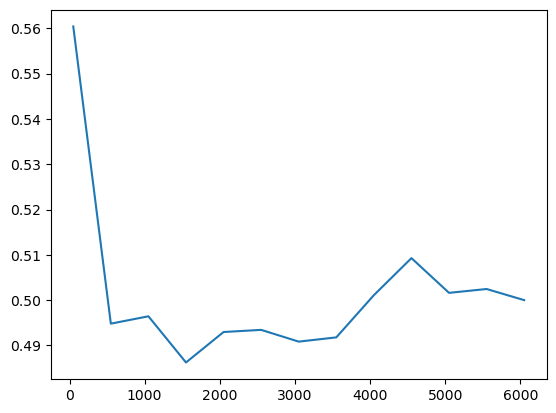

In [9]:
search_rf = BandwidthSearch(
    GWRandomForestClassifier,
    fixed=False,
    geometry=sample.centroid,
    search_method="interval",
    min_bandwidth=50,
    max_bandwidth=6250,
    interval=500,
    criterion='log_loss',
    leave_out=0.2,
    verbose=True,
    # max_iter=1000,
    metrics=['log_loss', 'oob_score', 'leave_out_log_loss', 'score', 'prediction_rate']
)
search_rf = search_rf.fit(X, y > 50)
search_rf.scores_.plot()

<Axes: >

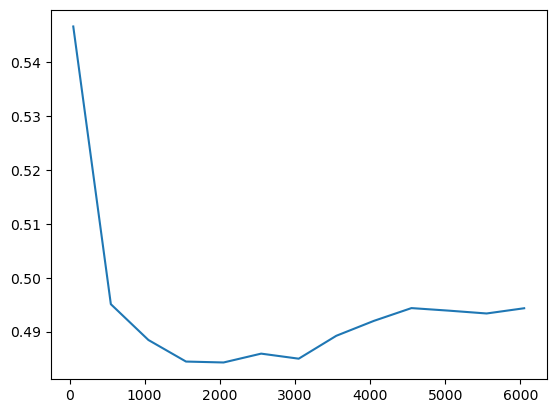

In [12]:
search_rf.metrics_.leave_out_log_loss.plot()

<Axes: >

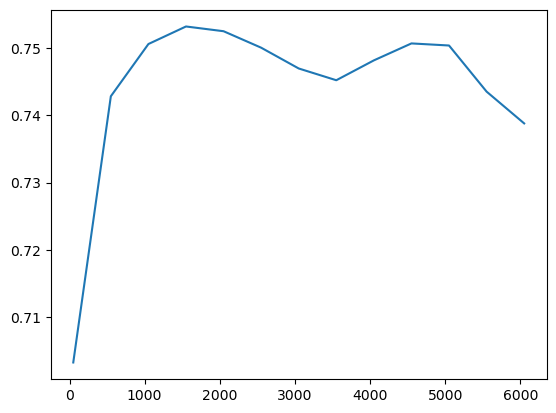

In [13]:
search_rf.metrics_.oob_score.plot()

<Axes: >

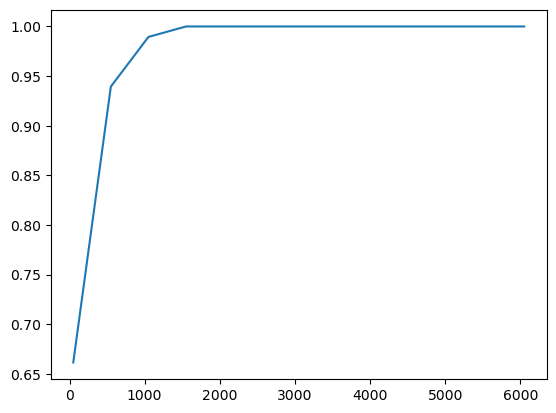

In [14]:
search_rf.metrics_.prediction_rate.plot()